In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        images = images.astype('float32') / 255.0
        labels = np.array(labels)
        return images, labels

train_images = []
train_labels = []

for i in range (5):
    file_path = f"D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/data_batch_{i+1}"
    images, labels = load_cifar10_batch(file_path)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

x_test, y_test = load_cifar10_batch("D:/Cool Yeah/Semester VI/IF3270 - Pembejalaran Mesin/Tubes 2/cifar-10-python/cifar-10-batches-py/test_batch")

In [3]:
x_train, x_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

### Variasi 1

<p>
Spesifikasi:<br/>
1 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
1 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3612 - loss: 1.7795 - val_accuracy: 0.5256 - val_loss: 1.3621
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5562 - loss: 1.2636 - val_accuracy: 0.5713 - val_loss: 1.2379
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6029 - loss: 1.1252 - val_accuracy: 0.6056 - val_loss: 1.1585
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6351 - loss: 1.0395 - val_accuracy: 0.6060 - val_loss: 1.1277
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6531 - loss: 0.9862 - val_accuracy: 0.6102 - val_loss: 1.1203
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6743 - loss: 0.9318 - val_accuracy: 0.6187 - val_loss: 1.1040
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.8841 - val_accuracy: 0.6176 - val_loss: 1.1041
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7056 - loss: 0.8461 - val_accuracy: 0.

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [ ]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3267 - loss: 1.8461 - val_accuracy: 0.5081 - val_loss: 1.3809
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5300 - loss: 1.3145 - val_accuracy: 0.5699 - val_loss: 1.2288
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5880 - loss: 1.1740 - val_accuracy: 0.5935 - val_loss: 1.1597
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6239 - loss: 1.0771 - val_accuracy: 0.6239 - val_loss: 1.0967
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6433 - loss: 1.0130 - val_accuracy: 0.6389 - val_loss: 1.0414
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6678 - loss: 0.9585 - val_accuracy: 0.6520 - val_loss: 1.0113
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6800 - loss: 0.9145 - val_accuracy: 0.6247 - val_loss: 1.1093
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6936 - loss: 0.8835 - val_accuracy

### Variasi 3

<p>
Spesifikasi:<br/>
3 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
3 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [ ]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2679 - loss: 1.9719 - val_accuracy: 0.4506 - val_loss: 1.5051
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4684 - loss: 1.4630 - val_accuracy: 0.5136 - val_loss: 1.3483
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5212 - loss: 1.3275 - val_accuracy: 0.5424 - val_loss: 1.2940
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5575 - loss: 1.2371 - val_accuracy: 0.5549 - val_loss: 1.2482
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5822 - loss: 1.1733 - val_accuracy: 0.5922 - val_loss: 1.1730
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6033 - loss: 1.1183 - val_accuracy: 0.6024 - val_loss: 1.1347
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6255 - loss: 1.0638 - val_accuracy: 0.6222 - val_loss: 1.0866
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6381 - loss: 1.0305 - val_accuracy: 0.

In [12]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.60      0.66      1000
           1       0.75      0.73      0.74      1000
           2       0.46      0.53      0.50      1000
           3       0.43      0.47      0.45      1000
           4       0.67      0.44      0.53      1000
           5       0.53      0.53      0.53      1000
           6       0.67      0.78      0.72      1000
           7       0.72      0.69      0.71      1000
           8       0.78      0.69      0.73      1000
           9       0.62      0.80      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

Macro F1-score: 0.6266


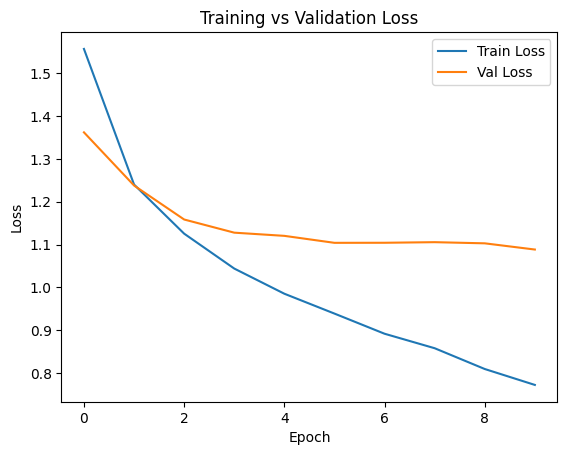

0.6266223681687745

In [8]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.83      0.76      0.79      1000
           2       0.50      0.61      0.55      1000
           3       0.53      0.47      0.50      1000
           4       0.58      0.64      0.61      1000
           5       0.59      0.58      0.59      1000
           6       0.75      0.75      0.75      1000
           7       0.74      0.70      0.72      1000
           8       0.85      0.69      0.76      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

Macro F1-score: 0.6741


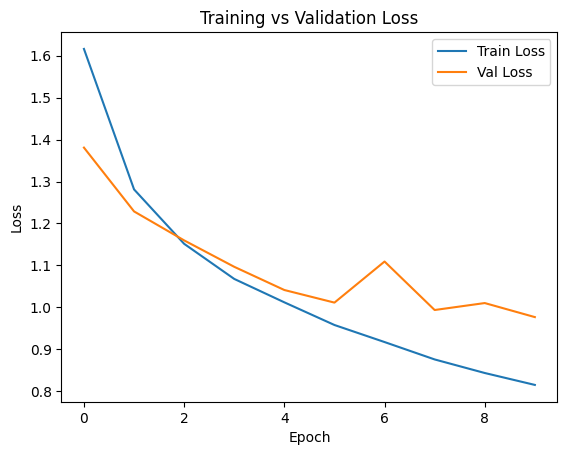

0.67409960482129

In [9]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1000
           1       0.77      0.78      0.77      1000
           2       0.57      0.47      0.52      1000
           3       0.47      0.48      0.48      1000
           4       0.54      0.63      0.58      1000
           5       0.54      0.54      0.54      1000
           6       0.70      0.74      0.72      1000
           7       0.71      0.66      0.68      1000
           8       0.73      0.78      0.75      1000
           9       0.76      0.70      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

Macro F1-score: 0.6463


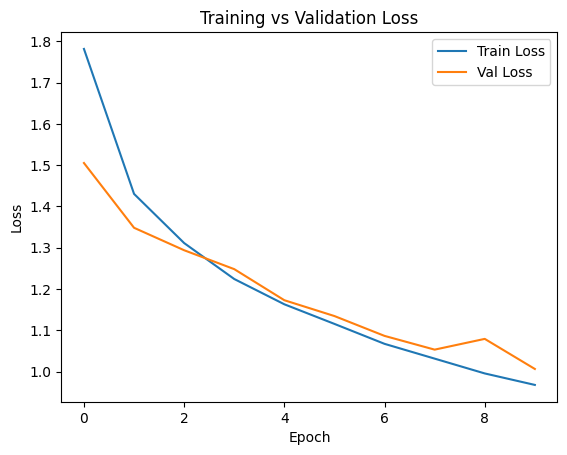

0.646331697512945

In [13]:
evaluate_model(model_3, x_test, y_test, history_3)